https://github.com/rickiepark/hg-mldl


- 구매자로부터 가장 사고싶은 과일 사진을 보내면
- 구매자가 가장 많이 요청하는 과일을 판매 목록으로 선정

- 문제점 : 사람들이 과일 사진을 너무 많이 보내줬는데, 이걸 하나하나 무슨 과일인지 체크할 사람이 없음

> 데이터 : 사람들이 보낸 과일 사진 
> 
> 정답이 없음 => 분류 모델 사용할 수 없음 
> 
> 클러스터링(군집) : 비지도 학습 모델 생성 

###### 클러스터링 vs 분류 : 정답이 있냐 없냐의 차이 

In [3]:
import numpy as np
import matplotlib.pyplot as plt

### 1. 데이터 로드 

In [4]:
fruits = np.load('fruits_300.npy')

In [7]:
# 총 300장 사진, 사진 1장 당 100x100 픽셀 => 모델 학습 시 사용되는 이미지의 크기는 모두 동일해야 함  
print(fruits.shape)

(300, 100, 100)


In [11]:
# 흑백사진 0~255 정수값 
print(fruits[0, 0, :])  # 첫 번째 줄 100개의 원소 

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


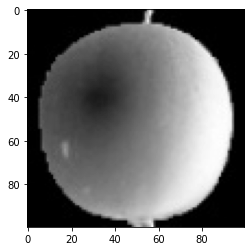

In [17]:
# 숫자가 0에 가까울수록 검게 나타남
# 사과 사진
plt.imshow(fruits[0], cmap='gray')
plt.show()

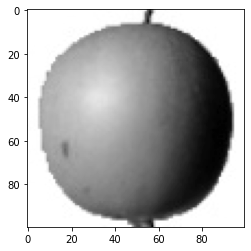

In [20]:
# 정상 원본 사진(gra_reverse) => 학습할 때 검은 색을 쓰는 이유는 feature에 더 집중하라고
plt.imshow(fruits[0], cmap='gray_r')   
plt.show()

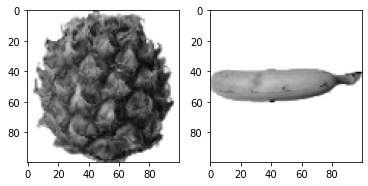

In [28]:
fig, axs = plt.subplots(1,2)
axs[0].imshow(fruits[100], cmap='gray_r')  # 파인애플
axs[1].imshow(fruits[200], cmap='gray_r')  # 바나나

# 데이터 :사과 100장, 파인애플 100장, 바나나 100장